<a href="https://colab.research.google.com/github/vkthakur90/AI_Applications/blob/master/Monte_Carlo_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mu = 0.10
sigma = 0.05
S0 = 100
year = 1
num_path = 100

In [3]:
e = np.random.normal(size = [365 * year, num_path])
t = np.arange(365 * year + 1)[..., np.newaxis] / 365

In [4]:
delta_t = 1.0/365.0

prev_S = S0 * np.ones_like(e[0, ...])

data_list = [prev_S]

for idx in range(365 * year):
    next_S = prev_S * np.exp(mu * delta_t + sigma * np.sqrt(delta_t) * e[idx, ...])
    data_list += [next_S]
    prev_S = next_S

S = np.stack(data_list, axis = 0)

In [5]:
data_df = pd.DataFrame(S)
data_df.columns = [f'S_{idx + 1:03}' for idx in range(num_path)]
data_df['t'] = t[..., 0]

In [6]:
data_df.eval('S = @S0 * exp(@mu * t)', inplace = True)

In [7]:
data_df.eval('res_S_1sigma = @S0 * exp(@mu * t + @sigma * sqrt(t))', inplace = True)
data_df.eval('res_S_2sigma = @S0 * exp(@mu * t + 2 * @sigma * sqrt(t))', inplace = True)
data_df.eval('res_S_3sigma = @S0 * exp(@mu * t + 3 * @sigma * sqrt(t))', inplace = True)

data_df.eval('supp_S_1sigma = @S0 * exp(@mu * t - @sigma * sqrt(t))', inplace = True)
data_df.eval('supp_S_2sigma = @S0 * exp(@mu * t - 2 * @sigma * sqrt(t))', inplace = True)
data_df.eval('supp_S_3sigma = @S0 * exp(@mu * t - 3 * @sigma * sqrt(t))', inplace = True)

<Axes: xlabel='t', ylabel='S_001'>

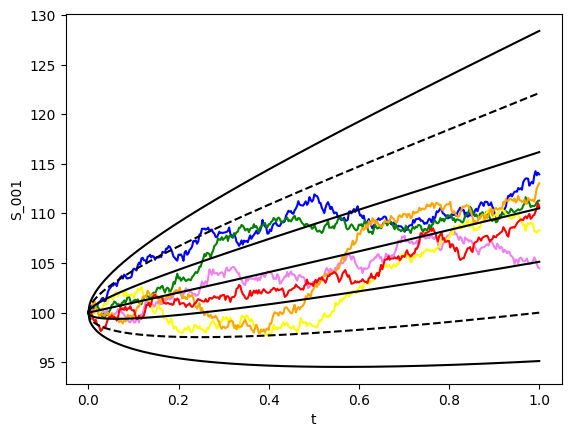

In [8]:
sns.lineplot(x = 't', y = 'S_001', data = data_df, color = 'violet')
sns.lineplot(x = 't', y = 'S_002', data = data_df, color = 'blue')
sns.lineplot(x = 't', y = 'S_003', data = data_df, color = 'green')
sns.lineplot(x = 't', y = 'S_004', data = data_df, color = 'yellow')
sns.lineplot(x = 't', y = 'S_005', data = data_df, color = 'orange')
sns.lineplot(x = 't', y = 'S_006', data = data_df, color = 'red')

sns.lineplot(x = 't', y = 'S', data = data_df, color = 'black')
sns.lineplot(x = 't', y = 'supp_S_1sigma', data = data_df, color = 'black')
sns.lineplot(x = 't', y = 'res_S_1sigma', data = data_df, color = 'black')
sns.lineplot(x = 't', y = 'supp_S_2sigma', data = data_df, color = 'black', linestyle = '--')
sns.lineplot(x = 't', y = 'res_S_2sigma', data = data_df, color = 'black', linestyle = '--')
sns.lineplot(x = 't', y = 'supp_S_3sigma', data = data_df, color = 'black')
sns.lineplot(x = 't', y = 'res_S_3sigma', data = data_df, color = 'black')